In [111]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow
from time import time

pd.options.display.float_format = '{:.0f}'.format

In [112]:
times={}
def time_calc(function,string):
    def wrapper():
        start=time()
        function()
        times[string]=time()-start
        return time()-start
    return wrapper

## READING CSV DIFFERENCE

In [113]:
start=time()
df=pl.read_csv("data/movie_data.csv")
end=time()
times["read_time_pl"]=end-start

In [114]:
start=time()
df_pd=pd.read_csv("data/movie_data.csv")
times["read_time_pd"]=time()-start

## FILTERING DIFFERENCE

In [115]:
start=time()
df.filter(pl.col("Runtime")>140).shape
times["filter_time_pl"]=time()-start

In [116]:
start=time()
df_pd[df_pd['Runtime']>140].shape
times["filter_time_pd"]=time()-start

In [117]:
start=time()
df.filter(pl.col("Genre").is_in(["Documentary","Thriller"])).shape
times["filter_time_pl2"]=time()-start


In [118]:
# df_pd[df_pd['Genre'].isin(["Documentary","Thriller"])]
start=time()
df_pd.query('Genre in ["Documentary","Thriller"]').shape
times["filter_time_pd2"]=time()-start

## Computation


In [119]:
start=time()
df.select([pl.col("Genre").unique()])
times["computation_pl"]=time()-start

In [120]:
start=time()
df_pd['Genre'].unique()
times["computation_pd"]=time()-start

## DESCRIBE

In [121]:
start=time()
df.describe()
times["describe_func_pl"]=time()-start

In [122]:
start=time()
df_pd.describe()
times["describe_func_pd"]=time()-start

## CREATION

In [123]:
probs = [x for x in range(1,10_000_000)]
percentiles = [x for x in range(1,10_000_000)]

In [124]:
start=time()
pl.DataFrame(dict(probs=probs, percentiles=percentiles)).shape
times["creation_time_pl"]=time()-start

In [125]:

start=time()
pd.DataFrame(dict(probs=probs, percentiles=percentiles)).shape
times["creation_time_pd"]=time()-start

In [126]:
start=time()
df.group_by('Genre').agg(pl.count().alias("in Number"))
times["aggregation_time_pl"]=time()-start

In [127]:
start=time()
df_pd.groupby('Genre').agg('count')
times["aggregation_time_pd"]=time()-start

In [128]:
start=time()
df.to_pandas()
times["pl_to_pandas"]=time()-start

# Result

### compared runtimes of polars and pandas dataframes

-- polars is faster and more easy to use in comparison to pandas

-- pandas had difficulties working with big data frames



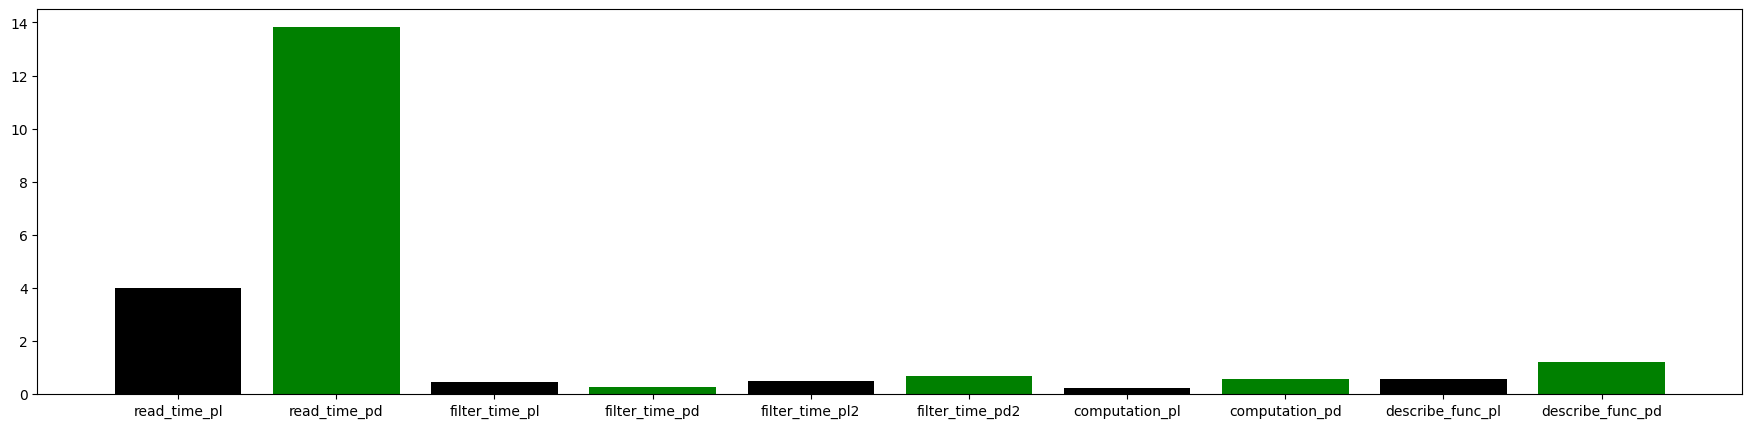

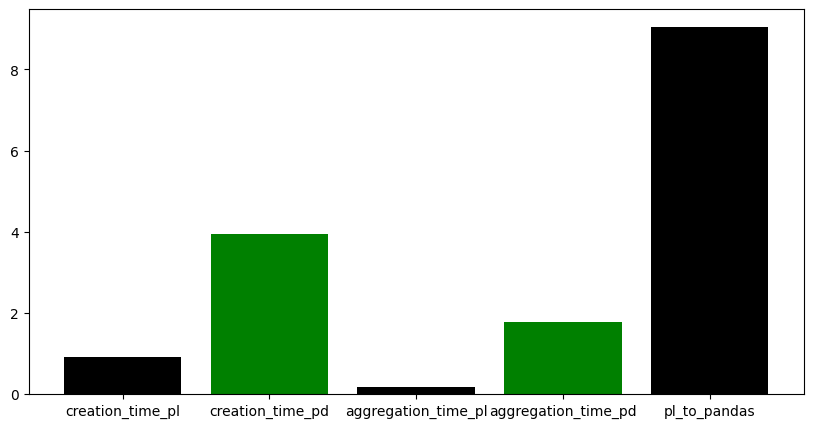

In [157]:
x = np.array(list(times.keys())[:-5])
y = np.array(list(times.values())[:-5])

x2 = np.array(list(times.keys())[-5:])
y2 = np.array(list(times.values())[-5:])
colors=['black','green']
colors2=['black','green','black','green']
plt.figure(figsize=(22,5))
plt.bar(x,y,color=colors)
plt.show()
plt.figure(figsize=(10,5))
plt.bar(x2,y2,color=colors)
plt.show()